In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
X = np.loadtxt("../../input/data_quality.txt", delimiter=",")
X[:5]

array([[3.23, 1.74],
       [0.95, 4.31],
       [3.11, 7.28],
       [6.55, 1.43],
       [8.41, 2.98]])

<AxesSubplot:>

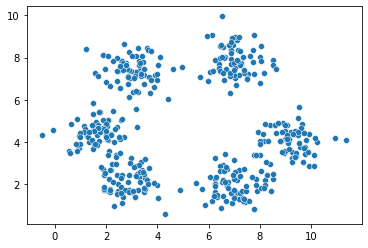

In [18]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [3]:
possible_num_clusters = np.arange(2, 10)
possible_num_clusters

array([2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
def get_silhouette_score(num_clusters):
    model = KMeans(init="k-means++", n_clusters=num_clusters, n_init=10)
    model.fit(X)

    score = silhouette_score(X, model.labels_, metric="euclidean", sample_size=len(X))

    print("Number of clusters =", num_clusters)
    print("Silhouette score =", score)

    return score

In [10]:
scores = np.array(list(map(get_silhouette_score, possible_num_clusters)))
scores

Number of clusters = 2
Silhouette score = 0.47762624870454473
Number of clusters = 3
Silhouette score = 0.5471742411734871
Number of clusters = 4
Silhouette score = 0.579480188968759
Number of clusters = 5
Silhouette score = 0.5890032635647954
Number of clusters = 6
Silhouette score = 0.6096904118954452
Number of clusters = 7
Silhouette score = 0.5531322689307149
Number of clusters = 8
Silhouette score = 0.4930628916122877
Number of clusters = 9
Silhouette score = 0.4662718418644569


array([0.47762625, 0.54717424, 0.57948019, 0.58900326, 0.60969041,
       0.55313227, 0.49306289, 0.46627184])

<AxesSubplot:>

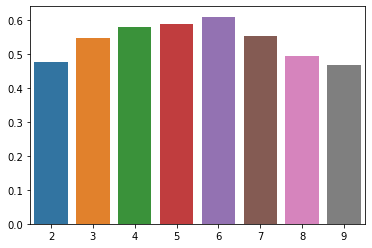

In [12]:
sns.barplot(x=possible_num_clusters, y=scores)

In [16]:
num_clusters = np.argmax(scores) + possible_num_clusters[0]
print("Optimal number of clusters =", num_clusters)

Optimal number of clusters = 6
